<a href="https://colab.research.google.com/github/ane-schow/oceanografia/blob/main/Diagrama_T_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de bioquimica
esse código tem como objetivo fazer os gráficos do relatório de bioqúimica usando os dados coletados no campo do dia 12/09/2024

In [ ]:
!pip install netCDF4

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [ ]:
fn = '/content/Dados de Campo.csv'
df = pd.read_csv(fn)
label = df.iloc[0]
df = df[1:]
df.columns = label
df.set_index('ID', inplace=True)

df['OD (%)'] = df['OD (%)'].replace('1,09', '109')

display(df)

,PROF(M),SECCHI,TEMP (°C),SAL.,OD (mgL),OD (%)
ID,,,,,,
N1,0,"3,2","21,2","21,5","8,03","100,5"
N1,"0,5",NaN,"21,3","21,6","7,85","98,9"
N1,1,NaN,"21,2","21,7","7,68","95,6"
N1,"1,5",NaN,"20,9","21,8","7,6","95,2"
N1,2,NaN,"20,8","21,8","7,79",97
N1,"2,5",NaN,"20,8","21,9","7,56","94,8"
N1,3,NaN,"20,7","21,9","7,44","90,3"
N1,"3,5",NaN,"20,8",22,"7,38","89,4"
N1,4,NaN,"20,8","22,1","7,06","89,1"


In [ ]:
t = pd.to_numeric(df['TEMP (°C)'].str.replace(',', '.'), errors='coerce')
p = pd.to_numeric(df['PROF(M)'].str.replace(',', '.'), errors='coerce')
s = pd.to_numeric(df['SAL.'].str.replace(',', '.'), errors='coerce')
ze = pd.to_numeric(df['SECCHI'].str.replace(',', '.'), errors='coerce')
zef = ze.fillna(0)
odp = pd.to_numeric(df['OD (%)'].str.replace(',', '.'), errors='coerce').replace(1.09, 109)
odmg = pd.to_numeric(df['OD (mgL)'].str.replace(',', '.'), errors='coerce')
data = pd.DataFrame({'TEMP (°C)': t, 'PROF(M)': p, 'SECCHI': zef, 'SAL.': s, 'OD (%)': odp, 'OD (mgL)': odmg})
estacao = data.groupby('ID')
n1 = estacao.get_group('N1')
n2 = estacao.get_group('N2')
c1 = estacao.get_group('C1')
c2 = estacao.get_group('C2')
canal = estacao.get_group('CANAL')
display(c2)

,TEMP (°C),PROF(M),SECCHI,SAL.,OD (%),OD (mgL)
ID,,,,,,
C2,21.9,0.0,2.5,23.2,109.0,8.40
C2,21.9,0.5,0.0,23.4,107.8,8.37
C2,21.9,1.0,0.0,23.4,107.2,8.30
C2,21.9,1.5,0.0,23.4,105.7,8.25
C2,21.9,2.0,0.0,23.4,106.1,8.25
C2,21.9,2.5,0.0,23.6,109.5,8.50
C2,21.8,3.0,0.0,23.4,108.0,8.44
C2,20.3,3.5,0.0,30.3,63.0,4.95


## Criar um gráfico T-S relacionando temperatura, salinidade e profundidade ou Temperatura, salinidade e oxigênio.

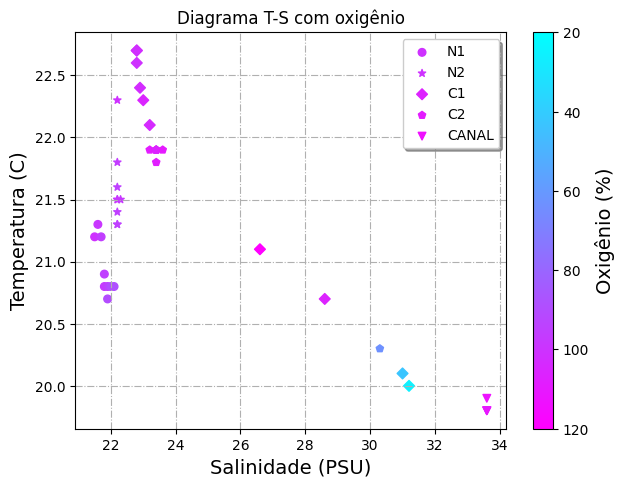

In [ ]:
fig, ax1 = plt.subplots()
sc1 = ax1.scatter(n1['SAL.'], n1['TEMP (°C)'], c=n1['OD (%)'], s=30, marker='o', cmap='cool', vmin=20, vmax=120)
sc2 = ax1.scatter(n2['SAL.'], n2['TEMP (°C)'], c=n2['OD (%)'], s=30, marker='*', cmap='cool', vmin=20, vmax=120)
sc3 = ax1.scatter(c1['SAL.'], c1['TEMP (°C)'], c=c1['OD (%)'], s=30, marker='D', cmap='cool', vmin=20, vmax=120)
sc4 = ax1.scatter(c2['SAL.'], c2['TEMP (°C)'], c=c2['OD (%)'], s=30, marker='p', cmap='cool', vmin=20, vmax=120)
sc5 = ax1.scatter(canal['SAL.'], canal['TEMP (°C)'], c=canal['OD (%)'], s=30, marker='v', cmap='cool', vmin=20, vmax=120)

ax1.set_ylabel('Temperatura (C)', color='k', fontsize=14)
ax1.set_xlabel('Salinidade (PSU)', fontsize=14)
ax1.tick_params(axis='y', labelcolor='k')

plt.legend(['N1', 'N2', 'C1', 'C2', 'CANAL'], loc='upper right',shadow=True, framealpha=1)
cbar = fig.colorbar(sc3, ax=ax1)
cbar.set_label('Oxigênio (%)',fontsize=14)
fig.tight_layout()
ax1.grid(linestyle='-.')
ax1.set_title('Diagrama T-S com oxigênio')
cbar.ax.invert_yaxis()
plt.show()

## Plotar o perfil de oxigênio na coluna d'água usando gráfico de linha para cada ponto de coleta.

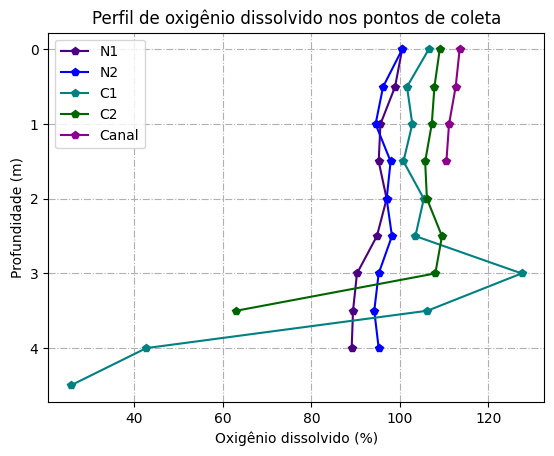

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(n1['OD (%)'], n1['PROF(M)'], color='indigo', marker='p', label='N1')
ax1.plot(n2['OD (%)'], n2['PROF(M)'], color='blue', marker='p', label='N2')
ax1.plot(c1['OD (%)'], c1['PROF(M)'], color='teal', marker='p', label='C1')
ax1.plot(c2['OD (%)'], c2['PROF(M)'], color='darkgreen', marker='p', label='C2')
ax1.plot(canal['OD (%)'], canal['PROF(M)'], color='darkmagenta', marker='p', label='Canal')

ax1.set_title('Perfil de oxigênio dissolvido nos pontos de coleta')
ax1.tick_params(axis='y', labelcolor='k')
ax1.invert_yaxis()
ax1.set_xlabel('Oxigênio dissolvido (%)')
ax1.set_ylabel('Profundidade (m)', color='k')
plt.legend()
plt.show()

## Figura com dois gráficos de regressão linear com o número de pearson, um relacionando oxigênio x temperatura e outro oxigênio x Salinidade.

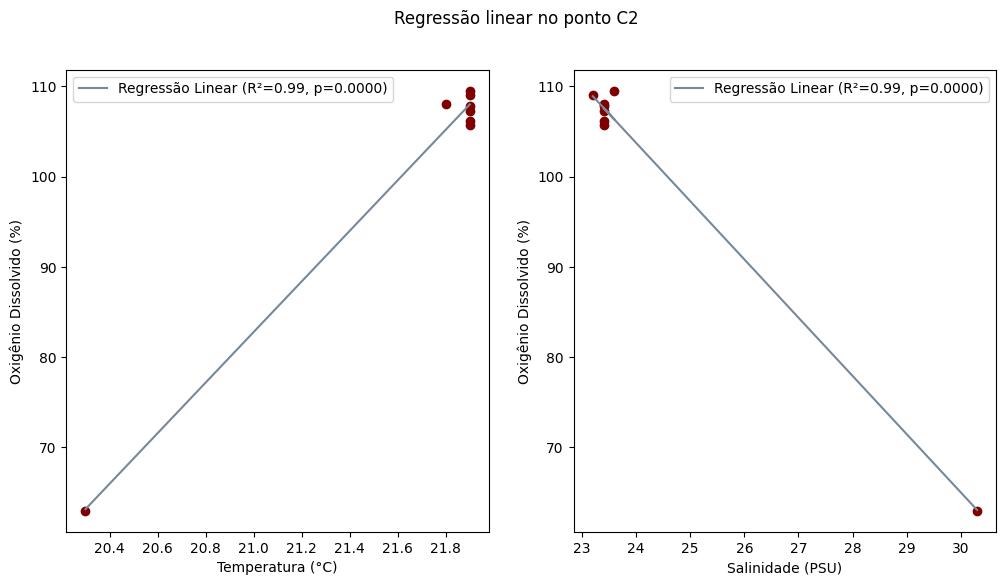

,TEMP (°C),PROF(M),SECCHI,SAL.,OD (%),OD (mgL)
ID,,,,,,
C2,21.9,0.0,2.5,23.2,109.0,8.40
C2,21.9,0.5,0.0,23.4,107.8,8.37
C2,21.9,1.0,0.0,23.4,107.2,8.30
C2,21.9,1.5,0.0,23.4,105.7,8.25
C2,21.9,2.0,0.0,23.4,106.1,8.25
C2,21.9,2.5,0.0,23.6,109.5,8.50
C2,21.8,3.0,0.0,23.4,108.0,8.44
C2,20.3,3.5,0.0,30.3,63.0,4.95


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(c2['TEMP (°C)'], c2['OD (%)'], color='maroon')
ax1.set_xlabel('Temperatura (°C)')
ax1.set_ylabel('Oxigênio Dissolvido (%)')
slope, intercept, r_value, p_value, std_err = stats.linregress(c2['TEMP (°C)'],c2['OD (%)'])
ax1.plot(c2['TEMP (°C)'], intercept + slope * c2['TEMP (°C)'], color='lightslategray', label=f'Regressão Linear (R²={r_value**2:.2f}, p={p_value:.4f})')
ax1.legend()
correlacao, p_value = stats.pearsonr(c2['TEMP (°C)'], c2['OD (%)'])

ax2.scatter(c2['SAL.'], c2['OD (%)'], color='maroon')
ax2.set_xlabel('Salinidade (PSU)')
ax2.set_ylabel('Oxigênio Dissolvido (%)')
slope, intercept, r_value, p_value, std_err = stats.linregress(c2['SAL.'],c2['OD (%)'])
ax2.plot(c2['SAL.'], intercept + slope * c2['SAL.'], color='lightslategray', label=f'Regressão Linear (R²={r_value**2:.2f}, p={p_value:.4f})')
#ax2.set_ylim(110.625, 113.625)
ax2.legend()

fig.suptitle('Regressão linear no ponto C2')
plt.show()
correlacao, p_value = stats.pearsonr(c2['SAL.'], c2['OD (%)'])
display(c2)